<a href="https://colab.research.google.com/github/Crowbar97/kl_div_of_distr_dens/blob/master/kl_div_of_distr_dens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!tree -a

.
├── .config
│   ├── active_config
│   ├── config_sentinel
│   ├── configurations
│   │   └── config_default
│   ├── gce
│   ├── .last_update_check.json
│   ├── logs
│   │   └── 2019.08.27
│   │       ├── 16.17.00.530950.log
│   │       ├── 16.17.07.367707.log
│   │       ├── 16.17.17.407104.log
│   │       ├── 16.17.21.663235.log
│   │       └── 16.17.22.686467.log
│   └── .metricsUUID
└── sample_data
    ├── anscombe.json
    ├── california_housing_test.csv
    ├── california_housing_train.csv
    ├── mnist_test.csv
    ├── mnist_train_small.csv
    └── README.md

5 directories, 17 files


In [1]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Aug 27 16:17 .
drwxr-xr-x 1 root root 4096 Oct  9 06:20 ..
drwxr-xr-x 1 root root 4096 Oct  7 15:14 .config
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data


In [0]:
!find / -iname *div_of*

In [0]:
import numpy as np
from scipy.special import gamma
from operator import add
from math import sqrt, pi, exp, log2
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

In [0]:
class Distributions:
    @staticmethod
    def normal_density(mean, variance, x):
        return 1 / sqrt(2 * pi * variance ** 2) * exp(- (x - mean) ** 2 / (2 * variance ** 2))
      
    @staticmethod
    def get_normal_density(mean, variance, x_points):
        return list(map(lambda p: Distributions.normal_density(mean, variance, p), x_points))

    @staticmethod
    def get_normal_points(mean, variance, count):
        return np.random.normal(mean, variance, int(count))

    @staticmethod
    def uniform_density(left_bound, right_bound, x):
        if left_bound <= x <= right_bound:
            return 1 / (right_bound - left_bound)
        return 0

    @staticmethod
    def get_uniform_points(left_bound, right_bound, count):
        return np.random.uniform(left_bound, right_bound, int(count))

    @staticmethod
    def beta_density(a, b, x):
        return gamma(a + b) / (gamma(a) * gamma(b)) * x ** (a - 1) * (1 - x) ** (b - 1)

    @staticmethod
    def get_beta_points(a, b, count):
        return np.random.beta(a, b, int(count))

In [0]:
class Parzen:
    @staticmethod
    def rect_kernel(z):
        return 0.5 * int(abs(z) < 1)

    @staticmethod
    def density(x, points, h):
        sum = 0
        for p in points:
            sum += Parzen.rect_kernel((x - p) / h)
        return 1 / (len(points) * h) * sum

    @staticmethod
    def estimate_density(distr_points, h, test_points):
        return list(map(lambda p: Parzen.density(p, distr_points, h),
                        test_points))

In [0]:
class Plotter:
    @staticmethod
    def plot(distr_name,
             test_points,
             distr_density, est_density,
             point_count):
        plt.figure()

        plt.plot(test_points, distr_density, 'go-', label=distr_name + " density")
        plt.plot(test_points, est_density, 'bo-', label="est density")

        plt.title("Parzen window density estimation"
                  "\npoint count = " + str(point_count),
                  fontsize=20)
        plt.xlabel("x", fontsize=20)
        plt.ylabel("density", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass
      
    @staticmethod
    def plot_ds(distr_name, point_counts, ds):
        plt.figure()

        plt.plot(point_counts, ds, 'bo-', label="KL")

        plt.title("KL Divergence\non " + distr_name + "distribution",
                  fontsize=20)
        plt.xlabel("n", fontsize=20)
        plt.ylabel("KL", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass

In [0]:
class Distances:
    @staticmethod
    def l2(d1, d2):
        return sqrt(reduce(add, map(lambda y1, y2: (y1 - y2) ** 2, d1, d2)))

    @staticmethod
    def kl(d1, d2):
      return reduce(add, map(lambda e1, e2: e1 * log2(e1 / e2), d1, d2))

In [0]:
# conditions
test_points = np.arange(-3, 3, 0.1)
window_size = 0.4

# normal distribution
mean, variance = 0, 1
normal_density = Distributions.get_normal_density(mean, variance, test_points)

point_counts = range(int(1e3), int(5e4), int(1e3))
kl_ds = []
for point_count in point_counts:
    print("Estimating KL for", point_count, "points...")
    normal_points = Distributions.get_normal_points(mean, variance, point_count)
    est_density = Parzen.estimate_density(normal_points, window_size, test_points)
    kl = Distances.kl(normal_density, est_density)
    print("KL =", kl)
    kl_ds.append(kl)

Estimating KL for 1000 points...
KL = 0.08080930020878427
Estimating KL for 2000 points...
KL = 0.04999059807697225
Estimating KL for 3000 points...
KL = 0.027452767140831984
Estimating KL for 4000 points...
KL = 0.026436306776938305
Estimating KL for 5000 points...
KL = 0.05465169265667201
Estimating KL for 6000 points...
KL = -0.0011477715685308397
Estimating KL for 7000 points...
KL = 0.01823481840256773
Estimating KL for 8000 points...
KL = 0.03021615184018757
Estimating KL for 9000 points...
KL = 0.017835141821130412
Estimating KL for 10000 points...
KL = 0.016112389792806124
Estimating KL for 11000 points...
KL = 0.012405873473958473
Estimating KL for 12000 points...
KL = 0.017495086673829326
Estimating KL for 13000 points...
KL = 0.02110621280079179
Estimating KL for 14000 points...
KL = 0.018135958652790333
Estimating KL for 15000 points...
KL = 0.029963735560236158
Estimating KL for 16000 points...
KL = 0.01654022076638376
Estimating KL for 17000 points...
KL = 0.0155258266225

In [0]:
# Plotter.plot("normal", test_points, normal_density, est_density, point_count)

In [0]:
# print(Distances.kl(normal_density, est_density))

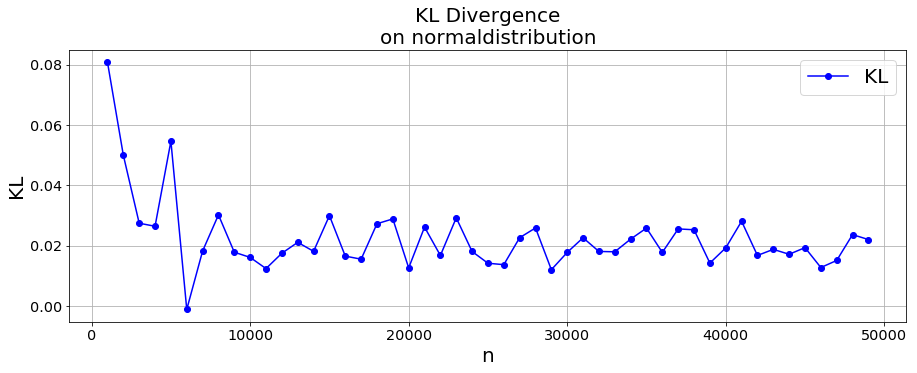

In [0]:
Plotter.plot_ds("normal", point_counts, kl_ds)